Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4740 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3579 - accuracy: 0.8699
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3217 - accuracy: 0.8810
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3002 - accuracy: 0.8900
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8666
Accuracy Rate = 0.866599977016449


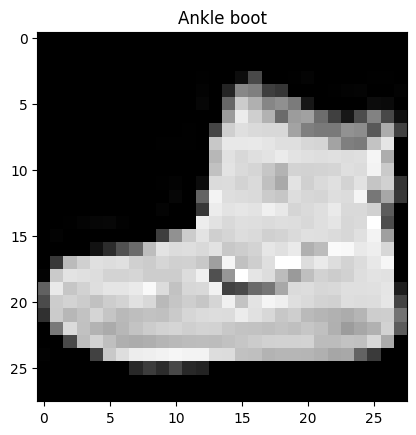

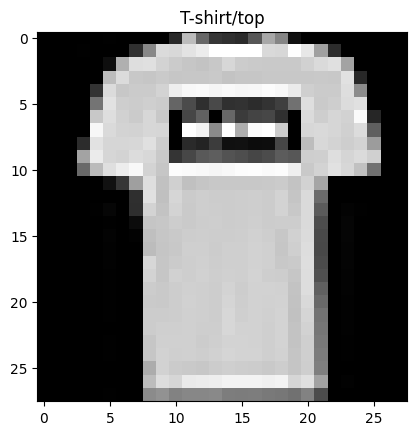

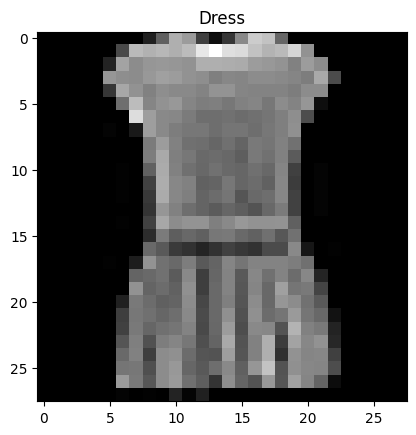

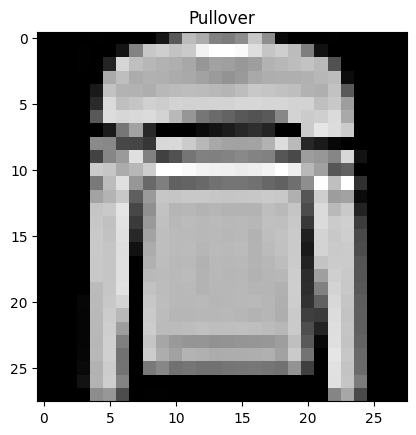

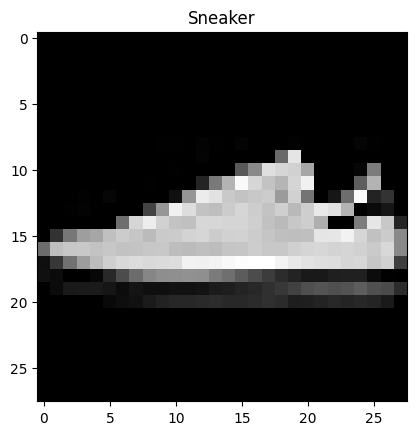

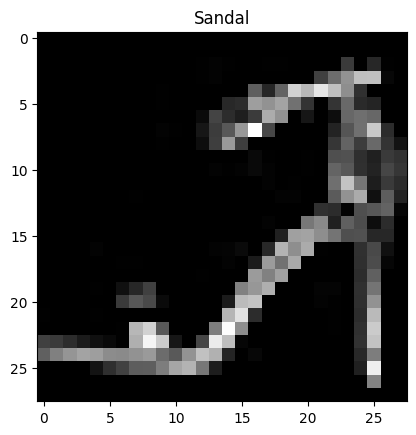

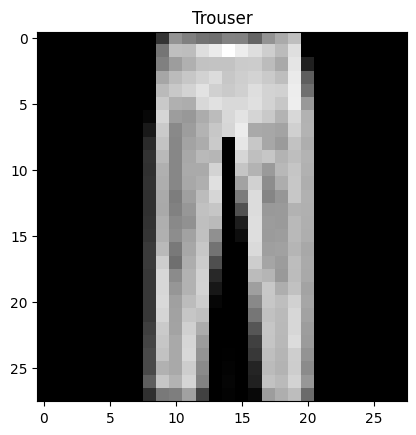

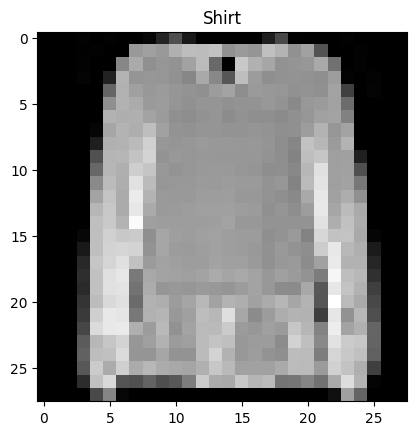

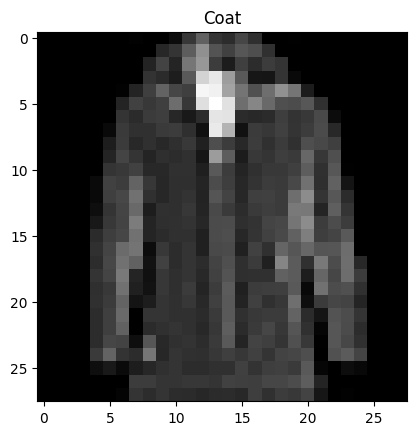

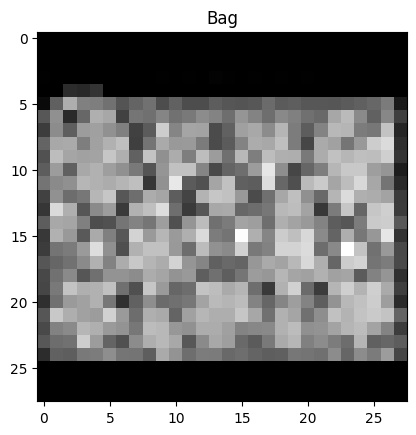

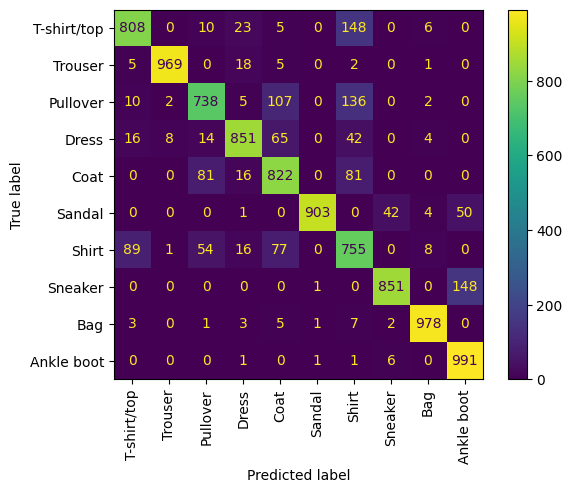

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize the pixel values to be in [0, 1]

# Create first network with Keras
# create model
model = Sequential()
# note: you need to flatten the image to a vector, to serve as the input layer of the network.
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,  activation='softmax'))
# model.add(Dense(1,  activation='sigmoid'))
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(x_train, y_train, epochs=5, batch_size=32)
# calculate predictions
predictions = model.predict(x_test)
y_test_hat = np.argmax(predictions, axis =1)

loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy Rate =", accuracy)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

printed_classes = set()
for i in range(len(y_train)):
  if y_train[i] not in printed_classes:
    plt.title(class_names[y_train[i]])
    plt.imshow(x_train[i,:,:], cmap = 'gray')
    plt.show()
    printed_classes.add(y_train[i])
  if len(printed_classes) == 10:
    break

matrix = confusion_matrix(y_test, y_test_hat, labels=range(10))
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=class_names)
disp.plot()
plt.xticks(rotation=90)
plt.show()